### libraries and data import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
from tensorflow.keras import backend
def MEE(y_true, y_pred):
    return backend.sqrt(backend.sum(backend.square(y_true - y_pred), axis=-1, keepdims=True))

import the ML_CUP training dataset

In [3]:
ml_train = pd.read_csv('ML-CUP21-TR - Copy.csv', sep=',', header=None)
ml_train.drop(0, axis = 1, inplace=True)
rename_dict = {}
for i in range(1,11): rename_dict[i] = f"attr_{i}"
rename_dict.update({11:'target_1', 12:'target_2'})
ml_train.rename( columns=rename_dict, inplace =True)

In [4]:
ml_train

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10,target_1,target_2
0,0.248433,-1.801874,-1.116485,1.255230,-1.021899,-1.425146,1.029583,1.261154,-0.185208,-0.618970,7.187592,-8.768943
1,0.612246,0.369337,1.119434,-0.689106,0.451776,1.308115,-0.518925,0.129025,-0.558788,1.588863,0.170888,-25.895562
2,-0.974871,0.275613,1.106435,-0.867804,0.230839,1.870421,-0.794584,-1.712529,-0.935208,0.109706,4.167006,-29.062891
3,-1.493339,1.992164,0.609691,-1.001476,1.268201,0.516364,-0.984814,-1.169440,-0.765422,-0.487069,7.259387,-31.529549
4,-0.432028,1.592409,0.853561,-1.365528,1.310392,0.954528,-0.946305,-1.269243,-2.031158,-0.227847,5.941430,-30.540759
...,...,...,...,...,...,...,...,...,...,...,...,...
1472,-0.694724,1.184451,1.426530,-1.260271,0.254272,1.588396,-1.015617,-1.269062,-0.738645,0.246257,4.587862,-29.743108
1473,2.088156,0.160464,-1.101186,0.864773,-0.002852,-0.650301,-0.311431,0.152538,0.548056,0.978403,-0.961247,-19.418516
1474,-0.096369,1.599799,0.160111,-1.473405,0.191667,1.389114,-1.265515,-0.833097,-0.747211,0.014422,4.247799,-29.460539
1475,0.417788,-0.062619,0.995768,-0.216366,0.054374,0.822223,-1.585737,-0.182712,0.271711,2.163382,-1.417041,-21.391002


split in order to obtain e test dataset

In [5]:
#X = ml_train.iloc[:,:10]
#y = ml_train.loc[:,['target_1','target_2']]
#X, X_test_final, y, y_test_final = train_test_split(X, y, test_size=0.1) 

In [7]:
X = pd.read_csv('X.csv')
X_test_final = pd.read_csv('X_test_final.csv')
y = pd.read_csv('y.csv')
y_test_final = pd.read_csv('y_test_final.csv')

In [8]:
print('len(X): ',len(X))
print('len(X_test_final): ',len(X_test_final))

len(X):  1329
len(X_test_final):  148


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 

In [10]:
ml_final_predict = pd.read_csv('ML-CUP21-TS - Copy.csv', sep=',', header=None)
ml_final_predict.drop(0, axis = 1, inplace=True)

In [11]:
ml_final_predict.shape

(540, 10)

checking ml_train statistics

In [12]:
ml_train.describe()

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10,target_1,target_2
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,0.255579,0.002654,0.133184,0.034346,-0.073823,0.130990,0.030048,0.099646,0.130991,0.210294,2.795525,-20.028458
std,0.956072,0.939628,1.052660,0.986982,0.830759,1.030170,0.969467,0.984523,0.999224,0.997632,2.985242,7.339448
min,-2.526427,-1.918939,-2.420890,-1.946351,-1.897417,-2.040401,-1.919660,-2.095531,-2.242666,-2.847029,-2.100573,-31.773589
25%,-0.402794,-0.861932,-0.766079,-0.908341,-0.802577,-0.823261,-0.916722,-0.804613,-0.804494,-0.490529,0.041258,-26.885766
50%,0.198597,0.058046,0.193591,0.140195,-0.022032,0.195010,0.130275,0.282215,0.326109,0.003434,2.739887,-19.944627
75%,0.880185,0.755629,1.064669,0.878915,0.605930,1.035666,0.855680,0.924605,0.891953,1.046291,5.415537,-13.588640
max,2.501544,2.464911,2.329639,2.327658,1.885105,2.282652,2.110213,2.048281,2.258689,2.819043,8.593776,-7.389552


we can see the dependent variables are already normalized

In [46]:
ml_train.corr()

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10,target_1,target_2
attr_1,1.000000,-0.370649,-0.208997,0.428348,-0.320656,-0.302670,0.421104,0.468909,0.615478,0.309578,-0.538047,0.360915
attr_2,-0.370649,1.000000,0.749709,-0.851603,0.854604,0.830024,-0.843520,-0.828193,-0.724982,0.324422,-0.188993,-0.911019
attr_3,-0.208997,0.749709,1.000000,-0.789491,0.760772,0.835961,-0.781919,-0.750957,-0.603868,0.525801,-0.473443,-0.836174
attr_4,0.428348,-0.851603,-0.789491,1.000000,-0.824352,-0.844937,0.851431,0.845974,0.763014,-0.289061,0.177189,0.906653
attr_5,-0.320656,0.854604,0.760772,-0.824352,1.000000,0.809952,-0.814305,-0.799896,-0.681047,0.341049,-0.239147,-0.893916
attr_6,-0.302670,0.830024,0.835961,-0.844937,0.809952,1.000000,-0.821524,-0.813541,-0.690196,0.390183,-0.318325,-0.891233
attr_7,0.421104,-0.843520,-0.781919,0.851431,-0.814305,-0.821524,1.000000,0.837279,0.734080,-0.308946,0.183875,0.909981
attr_8,0.468909,-0.828193,-0.750957,0.845974,-0.799896,-0.813541,0.837279,1.000000,0.779915,-0.246321,0.089767,0.883210
attr_9,0.615478,-0.724982,-0.603868,0.763014,-0.681047,-0.690196,0.734080,0.779915,1.000000,-0.063162,-0.167304,0.735887
attr_10,0.309578,0.324422,0.525801,-0.289061,0.341049,0.390183,-0.308946,-0.246321,-0.063162,1.000000,-0.785469,-0.361676


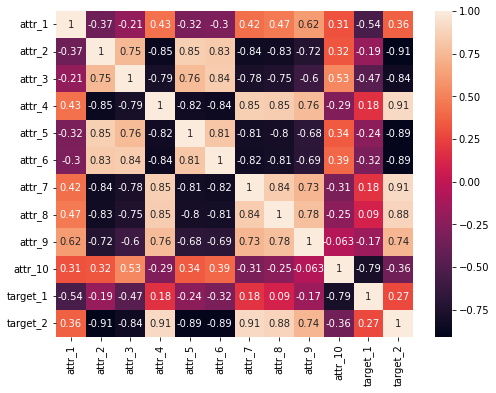

In [58]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(ml_train.corr(), annot=True)
plt.show()

we see overall high correlation among the features of the training set.
notably, target_2 has high correlation with attr 2,3,4,5,6,7,8,9.
attr7,8 have relatively correlation with almost all other attributes.
we see relatively low correlation between target1 and 2 (0.27)


In [19]:
def build_model(lrate, hidden_neurons, input_dim, mom = 0.0, nesterov = False, decay_rate = 0.0, weights = 'glorot_uniform', lam1 = 0.0, lam2 = 0.0):
    model = Sequential()
    model.add(Dense(hidden_neurons, input_dim=input_dim, activation='relu', kernel_initializer= weights,kernel_regularizer=regularizers.l1_l2(l1=lam1, l2=lam2)))
    model.add(Dense(1, activation='sigmoid', kernel_initializer = weights, kernel_regularizer=regularizers.l1_l2(l1=lam1, l2=lam2)))
    sgd = SGD(learning_rate=lrate, momentum=mom, nesterov= nesterov, decay = decay_rate)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

### single layer NN

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 

In [14]:
print('len(X_train): ',len(X_train))
print('len(X_test): ',len(X_test))

len(X_train):  1196
len(X_test):  133


In [15]:
def build_model_adam(neurons, l_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation = 'relu'))
    model.add(Dense(2))
    opt = Adam(learning_rate=l_rate)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

In [38]:
def build_model_sgd(neurons, l_rate, mom=0, decay=0, nesterov = True, weights_init = 'he_uniform'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= decay, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[MEE])
    return model

In [131]:
model= build_model_sgd(5,0.005)
res = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 1s 2ms/step - loss: 83.7883 - euc_dist_keras: 11.2331
Epoch 2/50
38/38 [==============================] - 0s 2ms/step - loss: 15.7459 - euc_dist_keras: 4.6484
Epoch 3/50
38/38 [==============================] - 0s 2ms/step - loss: 4.6903 - euc_dist_keras: 2.6453
Epoch 4/50
38/38 [==============================] - 0s 2ms/step - loss: 3.9353 - euc_dist_keras: 2.4037
Epoch 5/50
38/38 [==============================] - 0s 2ms/step - loss: 3.5240 - euc_dist_keras: 2.2668
Epoch 6/50
38/38 [==============================] - 0s 2ms/step - loss: 3.2327 - euc_dist_keras: 2.1674
Epoch 7/50
38/38 [==============================] - 0s 2ms/step - loss: 2.9977 - euc_dist_keras: 2.0862
Epoch 8/50
38/38 [==============================] - 0s 2ms/step - loss: 2.8361 - euc_dist_keras: 2.0276
Epoch 9/50
38/38 [==============================] - 0s 2ms/step - loss: 2.6975 - euc_dist_keras: 1.9777
Epoch 10/50
38/38 [==============================] - 0s 2ms/s

In [435]:
history_l = []
for _ in range(10):
    model = build_model_adam(3, 0.001)
    history = model.fit(X_train, y_train, epochs = 2000, batch_size = len(X_train), verbose=0).history
    history_l.append(history)
l1 = history_l.copy()

[]

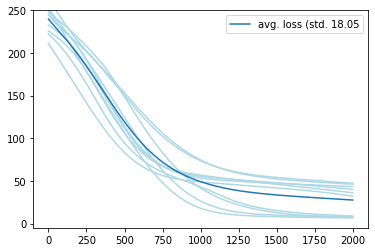

In [443]:
history_l = l1.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)}')
plt.ylim([-5,250])
plt.legend()
plt.plot()

In [445]:
history_l = []
for _ in range(10):
    model = build_model_sgd(3, 0.001)
    history = model.fit(X_train, y_train, epochs = 2000, batch_size = len(X_train), verbose=0).history
    history_l.append(history)
l1 = history_l.copy()

[]

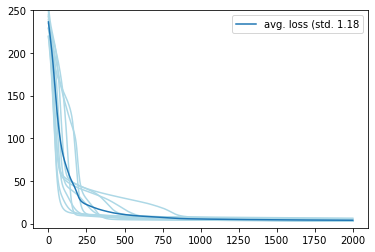

In [446]:
history_l = l1.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)}')
plt.ylim([-5,250])
plt.legend()
plt.plot()

In [447]:
history_l = []
for _ in range(10):
    model = build_model_sgd(3, 0.001, 0.5)
    history = model.fit(X_train, y_train, epochs = 2000, batch_size = len(X_train), verbose=0).history
    history_l.append(history)
l1 = history_l.copy()

[]

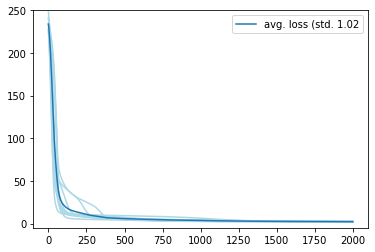

In [448]:
history_l = l1.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)}')
plt.ylim([-5,250])
plt.legend()
plt.plot()

In [451]:
history_l = []
for _ in range(10):
    model = build_model_sgd(3, 0.001, 0.5, 0.001/1000)
    history = model.fit(X_train, y_train, epochs = 2000, batch_size = len(X_train), verbose=0).history
    history_l.append(history)
l4 = history_l.copy()

[]

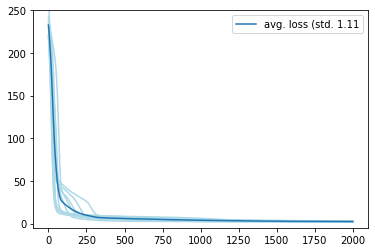

In [452]:
history_l = l4.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)}')
plt.ylim([-5,250])
plt.legend()
plt.plot()

In [460]:
model = build_model_sgd(3, 0.001)
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0).history

(-5.0, 250.0)

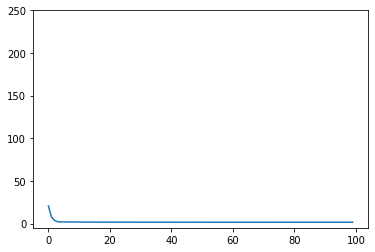

In [461]:
plt.plot(history['loss'])
plt.ylim([-5,250])

In [462]:
model = build_model_sgd(3, 0.001)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0).history

(-5.0, 250.0)

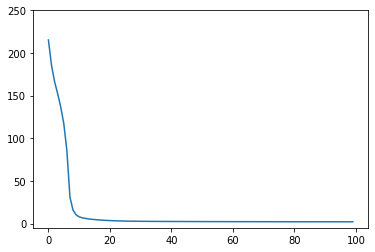

In [463]:
plt.plot(history['loss'])
plt.ylim([-5,250])

In [464]:
model = build_model_sgd(5, 0.001, 0.5, 0.001/100)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0).history

(-5.0, 250.0)

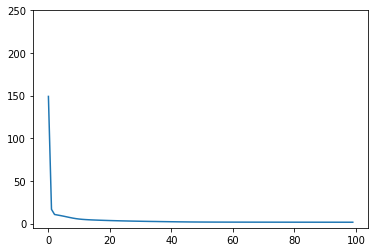

In [465]:
plt.plot(history['loss'])
plt.ylim([-5,250])

In [432]:
#adam
d = {}
for n_neurons in range(1,5):
  l_temp = []
  for _ in range(10):
    model = build_model_adam(n_neurons, 0.001)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp

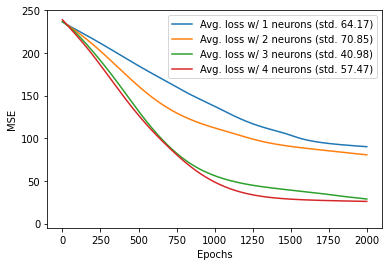

In [433]:
for n_neurons in range(1,5):
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ {n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([-5,250])
plt.legend()
plt.show()

In [456]:
#sgd with momentum and learning decay
d = {}
for n_neurons in range(1,5):
  l_temp = []
  for _ in range(10):
    model = build_model_sgd(n_neurons, 0.001, 0.5, 0.001/5000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
d_sgd_1234 = d.copy()

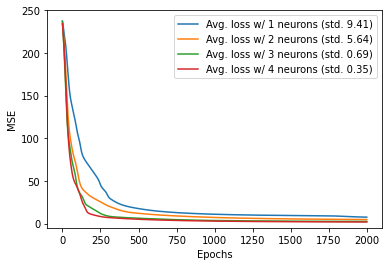

In [457]:
for n_neurons in range(1,5):
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ {n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([-5,250])
plt.legend()
plt.show()

In [30]:
d = {}
for n_neurons in [5,10,20,50,100]:
  l_temp = []
  for _ in range(2):
    model = build_model_sgd(n_neurons, 0.005, 0.9, 0.005/20000)
    x = model.fit(X_train, y_train, epochs=20000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
d_large_comp1 = d.copy()

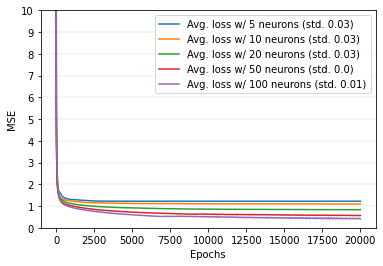

In [31]:
d = d_large_comp1.copy()
for n_neurons in [5,10,20,50,100]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ {n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(axis='y', linewidth =0.2)
plt.locator_params(axis='y', nbins=10)
plt.ylim([0,10])
plt.legend()
plt.show()

In [28]:
d = {}
for n_neurons in [5,10,20,50,100]:
  l_temp = []
  for _ in range(2):
    model = build_model_sgd(n_neurons, 0.003, 0.7, 0.003/1000)
    x = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
d_large_comp1 = d.copy()

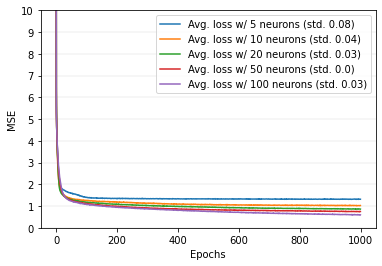

In [29]:
d = d_large_comp1.copy()
for n_neurons in [5,10,20,50,100]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ {n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.grid(axis='y', linewidth =0.2)
plt.locator_params(axis='y', nbins=10)
plt.ylim([0,10])
plt.legend()
plt.show()

we see that for a single hidden layer, the model reaches a cap at around 1 MSE.

### 5 neurons comparison between minibatch32 and batch mode

In [99]:
%%time
#sgd with momentum, ldecay - minibatch - 5neurons
model = build_model_sgd(5, 0.005, 0.5, 0.001/1000)
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 32, verbose=0).history
l_mini_trial1 = history.copy()

Wall time: 1min 9s


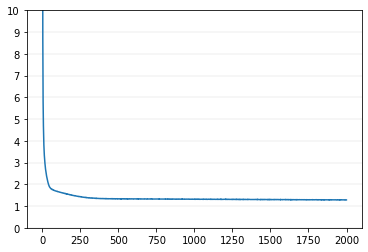

In [38]:
history_l = l_mini_trial1.copy()
plt.plot(history_l['loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [41]:
min(l_mini_trial1['loss'])

1.2774664163589478

In [53]:
for _ in l_mini_trial1['loss']: 
    if _ < 1.3: 
        print(l_mini_trial1['loss'].index(_))
        break

1275


In [39]:
#sgd with momentum, ldecay - batch - 5neurons
model = build_model_sgd(5, 0.001, 0.5, 0.001/10000)
history = model.fit(X_train, y_train, epochs = 50000, batch_size = len(X_train), verbose=0).history
l_mini_trial1_b = history.copy()

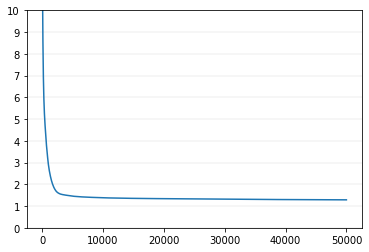

In [40]:
history = l_mini_trial1_b.copy()
plt.plot(history['loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [43]:
l_mini_trial1_b['loss'].index(min(l_mini_trial1_b['loss']))

49999

In [55]:
for _ in l_mini_trial1_b['loss']: 
    if _ < 1.3: 
        print(l_mini_trial1_b['loss'].index(_))
        break

38637


In [63]:
print(len(X_train))

1196


from the above we see that with the same learning rate, batch mode or minibatch require the same ammount of computations:
- minibatch32 needed 1275 epochs to reach 1.3 loss which means 1275*(1196/32) = 44000 weights update computations
- batch needed 38637 epochs thus approximately the same number (we have to count for a bit of variance)

from a fitting point of view we saw that there is no major difference between minibatch and batch. However we are interested in understanding two questions:
1. can batch offer us lower training time by supporting a higher learning rate (we know that batch is more stable, can we leverage this to use a higher learning rate and thus wait less for training?)
2. is there a generalization capability difference between minibatch and batch?

In [ ]:
#minibatch32

In [86]:
%%time
#sgd with momentum, ldecay - minibatch - 5neurons - 2000 epochs -> 74'000 (epochs*(len_train/batch_size)) weights updates
model = build_model_sgd(5, 0.003, 0.7, 0.003/4000)
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 32, verbose=0).history
l_mini_trial3 = history.copy()

Wall time: 1min 18s


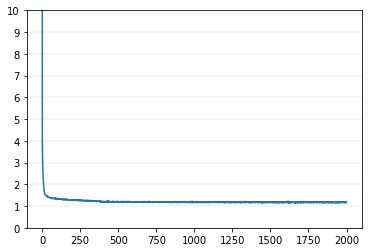

In [87]:
history_l = l_mini_trial3.copy()
plt.plot(history_l['loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [88]:
print(min(l_mini_trial3['loss']))
print(l_mini_trial3['loss'].index(min(l_mini_trial3['loss'])))

1.1466702222824097
1095


In [89]:
for _ in l_mini_trial3['loss']: 
    if _ < 1.2: 
        print(l_mini_trial3['loss'].index(_))
        break

385


In [85]:
#sgd with momentum, ldecay - minibatch - 5neurons - 2000 epochs -> 74'000 (epochs*(len_train/batch_size)) weights updates
model = build_model_sgd(5, 0.005, 0.9, 0.001/4000)
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 32, verbose=0).history
l_mini_trial1 = history.copy()

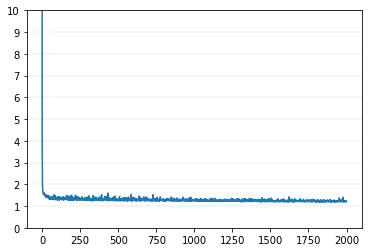

In [86]:
history_l = l_mini_trial1.copy()
plt.plot(history_l['loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [74]:
min(l_mini_trial1['loss'])

NameError: name 'l_mini_trial1' is not defined

In [89]:
for _ in l_mini_trial1['loss']: 
    if _ < 1.2: 
        print(l_mini_trial1['loss'].index(_))
        break

1424


In [ ]:
#batch

In [80]:
#sgd with momentum, ldecay - batch - 5neurons
model = build_model_sgd(5, 0.005, 0.9, 0.001/37000)
history = model.fit(X_train, y_train, epochs = 37000, batch_size = len(X_train), verbose=0).history
l_batch_trial1_b1 = history.copy()

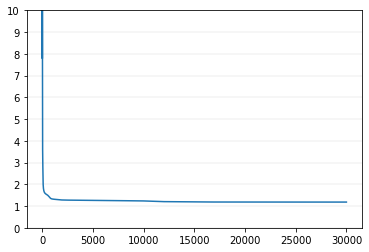

In [81]:
history = l_batch_trial1_b1.copy()
plt.plot(history['loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [82]:
print(min(l_batch_trial1_b1['loss']))
print(l_batch_trial1_b1['loss'].index(min(l_batch_trial1_b1['loss'])))

1.1829756498336792
29998


In [91]:
for _ in l_batch_trial1_b1['loss']: 
    if _ < 1.2: 
        print(l_batch_trial1_b1['loss'].index(_))
        break

12499


In [17]:
%%time
#sgd with momentum, ldecay - batch - 5neurons
model = build_model_sgd(5, 0.01, 0.9, 0.01/32000)
history = model.fit(X_train, y_train, epochs = 32000, batch_size = len(X_train), verbose=0).history
l_batch_trial1_b2 = history.copy()

Wall time: 3min 38s


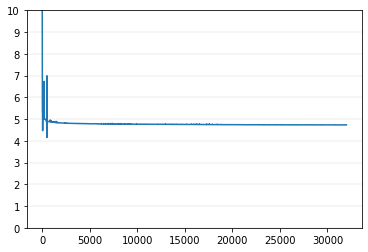

In [18]:
history = l_batch_trial1_b2.copy()
plt.plot(history['loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [61]:
print(min(l_batch_trial1_b2['loss']))
print(l_batch_trial1_b2['loss'].index(min(l_batch_trial1_b2['loss'])))

1.189501166343689
29997


In [62]:
for _ in l_batch_trial1_b2['loss']: 
    if _ < 1.2: 
        print(l_batch_trial1_b2['loss'].index(_))
        break

2951


we see that if we update the learning rate and momentum, the fitting improves for both batch and minibatch, however we can clearly see that minibatch starts becoming increasingly instable and starts performing relatively poorer wrt batch with keeps the learning stable even with stronger learning parameters.
- with minibatch32 we need 570*37 = 21000 weight updates to reach 1.2 loss
- with batch we need around 3000 weights updates.

the question that still remains is whether this faster learning enabled by batch (which clearly is helping us by making us wait less) has repercursions on the generalization capabilities of the model wrt to a slower learning (both with batch and minibatch). in other words: does learning faster has repercussions on the generalization?

### single validation

In [15]:
def build_model_sgd(neurons, l_rate, mom=0, decay_epochs=10000, nesterov = True, weights_init = 'he_uniform'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= l_rate/decay_epochs, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[MEE])
    return model

In [ ]:
#minibatch32

In [52]:
%%time
#sgd with momentum, ldecay - minibatch - 5neurons
model = build_model_sgd(5, 0.0005, 0.7, 1500)
history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
l_mini_trial1 = history.copy()

Wall time: 2min 21s


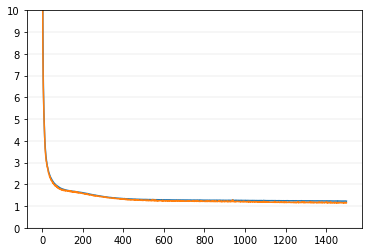

In [54]:
history_l = l_mini_trial1.copy()
plt.plot(history_l['loss'])
plt.plot(history_l['val_loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [95]:
%%time
#sgd with momentum, ldecay - minibatch - 5neurons - 2000 epochs -> 74'000 (epochs*(len_train/batch_size)) weights updates
model = build_model_sgd(5, 0.003, 0.7, 0.003/4000)
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
l_mini_trial3 = history.copy()

Wall time: 3min 27s


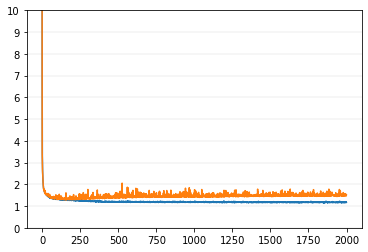

In [102]:
history_l = l_mini_trial3.copy()
plt.plot(history_l['loss'])
plt.plot(history_l['val_loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [ ]:
#batch

In [96]:
#sgd with momentum, ldecay - batch - 5neurons
model = build_model_sgd(5, 0.005, 0.9, 0.001/74000)
history = model.fit(X_train, y_train, epochs = 32000, batch_size = len(X_train), validation_data=(X_test,y_test), verbose=0).history
l_batch_trial1_b1 = history.copy()

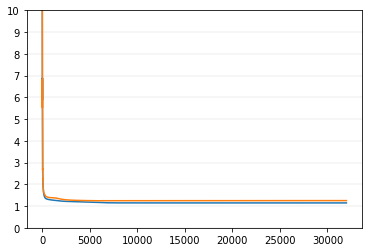

In [103]:
history = l_batch_trial1_b1.copy()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [98]:
%%time
#sgd with momentum, ldecay - batch - 5neurons
model = build_model_sgd(5, 0.01, 0.9, 0.05/80000)
history = model.fit(X_train, y_train, epochs = 32000, batch_size = len(X_train), validation_data=(X_test,y_test), verbose=0).history
l_batch_trial1_b2 = history.copy()

Wall time: 29min 56s


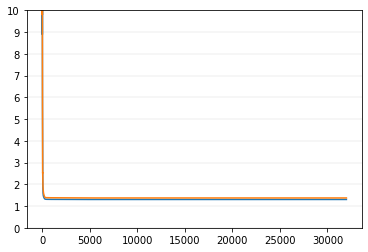

In [104]:
history = l_batch_trial1_b2.copy()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

we saw that altough batch mode provide the most stable results, it is increadibly more clostly when it comes to validation, as validation is compute on every epochs. We also saw that the more the (minibatch) model becomes instable, the less it generalizes

let's try to find the 

In [ ]:
#minibatch32

In [56]:
#sgd with momentum, ldecay - minibatch
d = {}
for _ in [0.0005,0.001,0.0015,0.002]:
    model = build_model_sgd(5, _, 0.7, _ /1500)
    history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
    d[_] = history
d_val1 = d.copy()

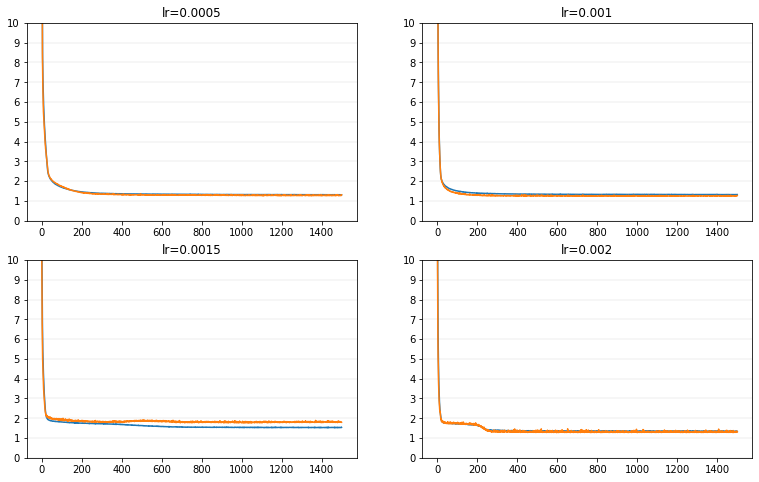

In [59]:
history_d = d_val1.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([0.0005,0.001,0.0015,0.002], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.25)
    plt.title(f'lr={_}')
plt.show()

In [159]:
#sgd with momentum, ldecay - minibatch
d = {}
for _ in [5,10,20,50]:
    model = build_model_sgd(_, 0.0005, 0.7, 0.0005 /1500)
    history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
    d[_] = history
d_val2 = d.copy()

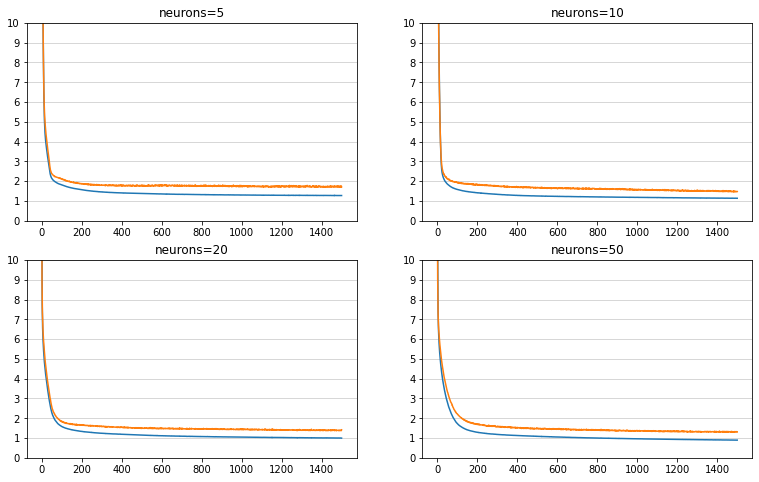

In [160]:
history_d = d_val2.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([5,10,20,50], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(history_d[_]['loss'])
    plt.plot(history_d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.5)
    plt.title(f'neurons={_}')
plt.show()

In [149]:
#sgd with momentum, ldecay - minibatch
d = {}
for _ in [80,100,150,200]:
    model = build_model_sgd(_, 0.0005, 0.7, 0.0005 /1500)
    history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
    d[_] = history
d_val2_max = d.copy()

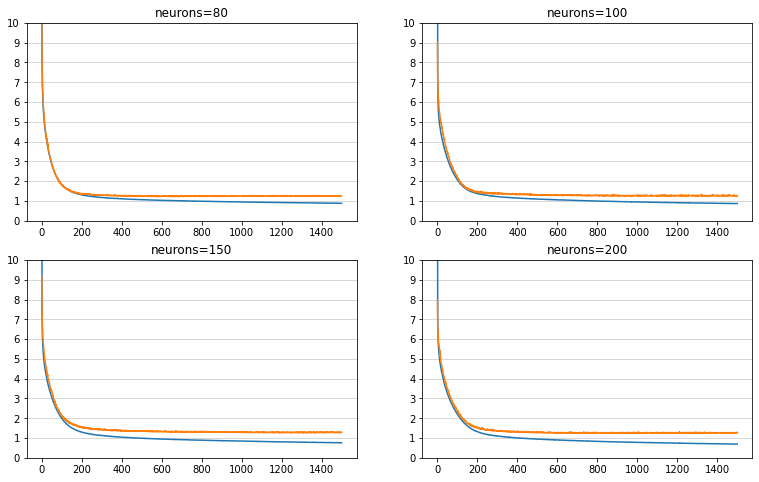

In [151]:
history_d = d_val2_max.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([80,100,150,200], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(history_d[_]['loss'])
    plt.plot(history_d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.5)
    plt.title(f'neurons={_}')
plt.show()

In [ ]:
#sgd with momentum, ldecay - minibatch
d = {}
for _ in [0.0005,0.001,0.0015,0.002]:
    model = build_model_sgd(20, _, 0.7, _ /1500)
    history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
    d[_] = history
d_val_20 = d.copy()

In [ ]:
history_d = d_val_20.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([0.0005,0.001,0.0015,0.002], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.3)
    plt.title(f'lr={_}')
plt.show()

In [146]:
#sgd with momentum, ldecay - minibatch
d = {}
for _ in [0.0005,0.001,0.0015,0.002]:
    model = build_model_sgd(50, _, 0.7, _ /1500)
    history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
    d[_] = history
d_val_50 = d.copy()

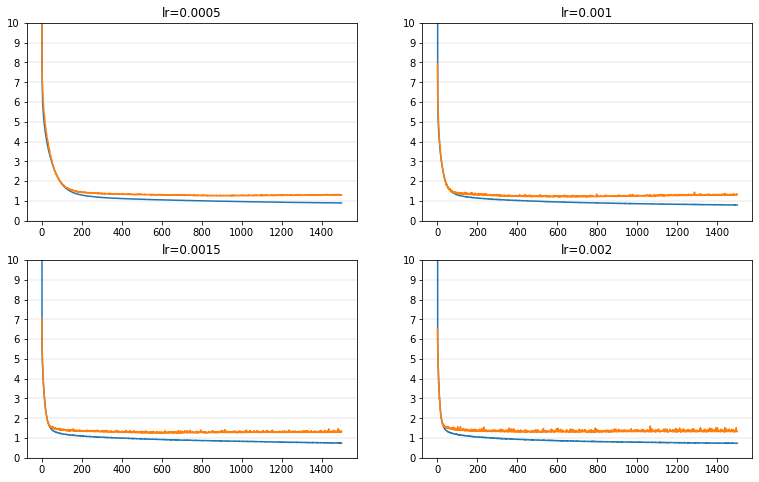

In [147]:
history_d = d_val_50.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([0.0005,0.001,0.0015,0.002], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.3)
    plt.title(f'lr={_}')
plt.show()

In [40]:
#two layers

In [30]:
def build_model_sgd_2hl(neurons_l1,neurons_l2, l_rate, mom=0, decay=0, nesterov = True, weights_init = 'he_uniform', input_dim = X_train.shape[1]):
    model = Sequential()
    model.add(Dense(neurons_l1, input_dim=input_dim, activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(neurons_l2, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= decay, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[MEE])
    return model

In [26]:
d = {}
for n_neurons in [5,10,20,50]:
    model = build_model_sgd_2hl(10, n_neurons, 0.0005, 0.7, 0.0005 /1500)
    x = model.fit(X_train, y_train, epochs=1500, validation_data=(X_test,y_test), batch_size=32, verbose=0).history
    d[n_neurons] = x
d_val_c10 = d.copy()

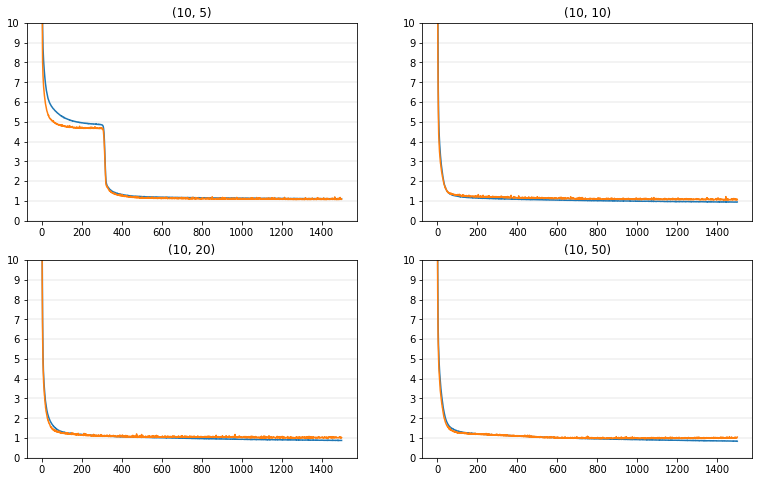

In [43]:
d = d_val_c10.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([5,10,20,50], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.3)
    plt.title(f'{10,_}')
plt.show()

In [161]:
d = {}
for n_neurons in [5,10,20,50]:
    model = build_model_sgd_2hl(20, n_neurons, 0.0005, 0.7, 0.0005 /1500)
    x = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test,y_test), verbose=0).history
    d[n_neurons] = x
d_val_c20 = d.copy()

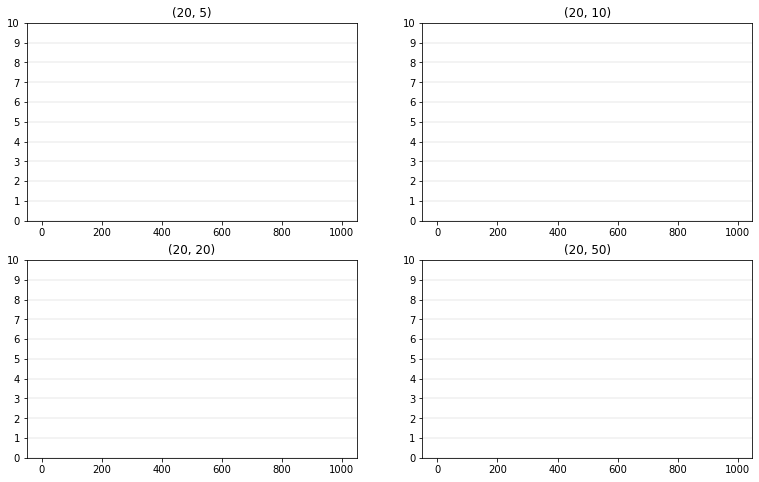

In [162]:
d = d_val_c20.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([5,10,20,50], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.3)
    plt.title(f'{20,_}')
plt.show()

In [30]:
d = {}
for n_neurons in [5,10,20,50]:
    model = build_model_sgd_2hl(50, n_neurons, 0.0005, 0.7, 0.0005 /1500)
    x = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test,y_test), verbose=0).history
    d[n_neurons] = x
d_val_c50 = d.copy()

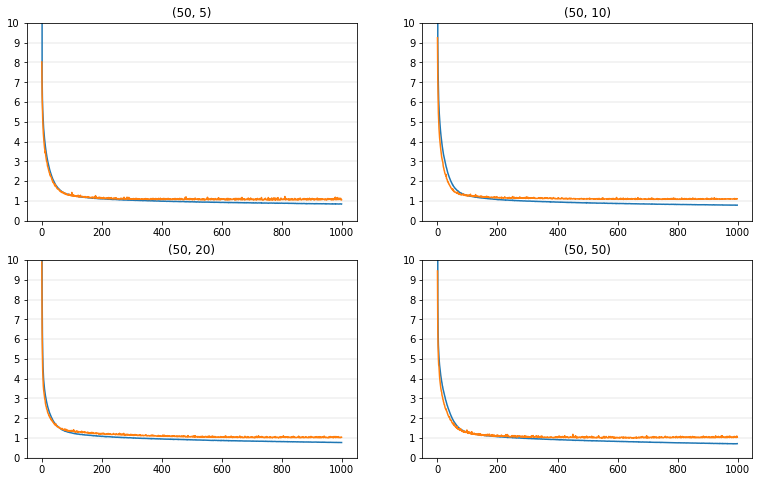

In [38]:
d = d_val_c50.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([5,10,20,50], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.3)
    plt.title(f'{50,_}')
plt.show()

In [31]:
%%time
#sgd with momentum, ldecay - minibatch - 5neurons
model = build_model_sgd_2hl(10,5, 0.0005, 0.7, 0.001 /1500)
history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
l_mini_trialz = history.copy()

Wall time: 1min 30s


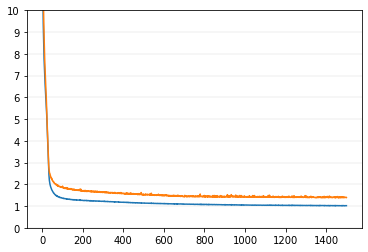

In [32]:
history_l = l_mini_trialz.copy()
plt.plot(history_l['loss'])
plt.plot(history_l['val_loss'])
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [32]:
#3 HIDDEN LAYERS

In [18]:
def build_model_sgd_3hl(neuron1,neuron2,neuron3, l_rate, mom=0, decay_epochs=10000, nesterov = True, weights_init = 'he_uniform'):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=X_train.shape[1], activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(neuron2, activation='relu'))
    model.add(Dense(neuron3, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= l_rate/decay_epochs, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[MEE])
    return model

In [35]:
d = {}
for n_neurons in [5,10,20,50]:
    model = build_model_sgd_3hl(20, n_neurons, n_neurons, 0.0005, 0.7, 0.0005 /1500)
    x = model.fit(X_train, y_train, epochs=1500, validation_data=(X_test,y_test), batch_size=32, verbose=0).history
    d[n_neurons] = x
d_val_3h10 = d.copy()

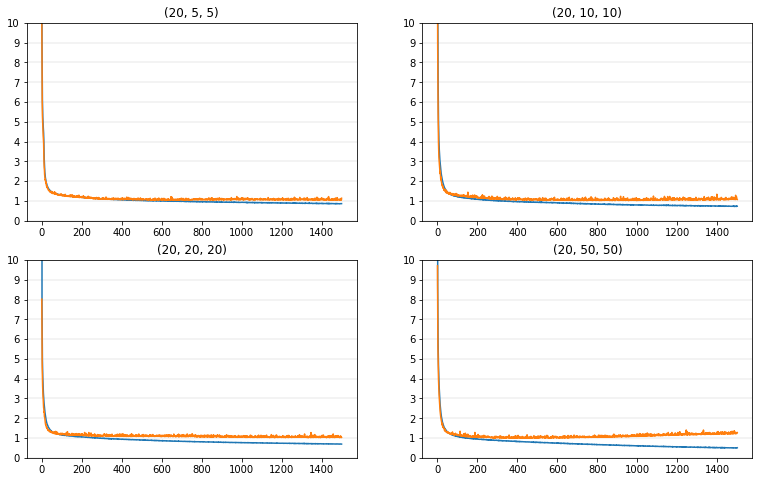

In [37]:
d = d_val_3h10.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, n0,n1 in zip([5,10,20,50], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.3)
    plt.title(f'{20, _, _,}')
plt.show()

In [ ]:
def get_val(model):
    x = model.fit(X_train, y_train, epochs=1500, validation_data=(X_test,y_test), batch_size=32, verbose=0).history
    return x
d={}
d['5-5-5'] = get_val(build_model_sgd_3hl(5, 5, 5, 0.0005, 0.7, 0.0005 /1500)
d['10-10-10'] = get_val(build_model_sgd_3hl(10, 10, 10, 0.0005, 0.7, 0.0005 /1500)
d['10-20-10'] = get_val(build_model_sgd_3hl(10, 20, 10, 0.0005, 0.7, 0.0005 /1500)
d['20-10-20'] = get_val(build_model_sgd_3hl(20, 10, 20, 0.0005, 0.7, 0.0005 /1500)

[5, 5, 5]
[10, 10, 10]


In [26]:
d = {}
for n in [[5,5,5],[10,10,10],[10,20,10],[20,10,20]]:
    model = build_model_sgd_3hl(n[0], n[1], n[2], 0.0005, 0.7, 1500)
    x = model.fit(X_train, y_train, epochs=1500, validation_data=(X_test,y_test), batch_size=32, verbose=0).history
    d[f'{n[0]}-{n[1]}-{n[2]}'] = x
d_val_3h10 = d.copy()

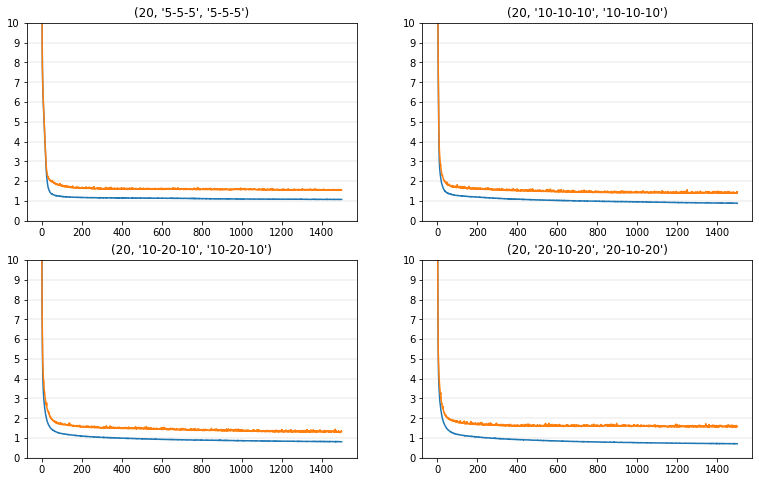

In [27]:
d = d_val_3h10.copy()
fig, ax = plt.subplots(2,2,figsize=(13,8))
for n, n0,n1 in zip([[5,5,5],[10,10,10],[10,20,10],[20,10,20]], [0,0,1,1],[0,1,0,1]):
    _ = f'{n[0]}-{n[1]}-{n[2]}'
    plt.sca(ax[n0,n1])
    plt.plot(d[_]['loss'])
    plt.plot(d[_]['val_loss'])
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth =0.3)
    plt.title(f'{20, _, _,}')
plt.show()

In [154]:
%%time
#sgd with momentum, ldecay - minibatch - 5neurons
model = build_model_sgd_2hl(10,5, 0.0005, 0.7, 0.001 /1500)
history = model.fit(X_train, y_train, epochs = 1500, batch_size = 32, validation_data=(X_test,y_test), verbose=0).history
l_mini_trialz = history.copy()

Wall time: 3min 38s


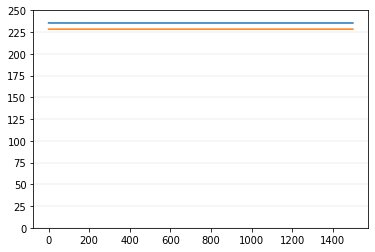

In [156]:
history_l = l_mini_trialz.copy()
plt.plot(history_l['loss'])
plt.plot(history_l['val_loss'])
plt.ylim([0,250])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [35]:
model= build_model_sgd_2hl(5,5,0.0005, 0.5)
model.fit(X_train,y_train,epochs=500, batch_size=32, verbose=0)
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 9ms/step - loss: 2.5344 - MAE: 1.2527


[2.534395694732666, 1.2526674270629883]

### 5kfold cross validation

after assessing what toponomy and learning paramaters seems to work for our problem, we now engage in a more thorough graphical analysis using cross validation so as to be able to more reliably compare various parameter. 

For doing so we invistigated the possibility of parallelizing the computation (as the cross validation loops are indipendent).
We tried two libraries: ipyparallel and Dask. After thourougly testing both, altough Dask has easier setups for deploy its cluster on the cloud, we prefered the ipyparallel library which seems to work well locally. 

In [7]:
kfold = KFold(n_splits=5, shuffle=True)

In [8]:
def build_model_sgd_2hl(neurons_l1,neurons_l2, l_rate, mom=0, decay_epochs=10000, nesterov = True, weights_init = 'he_uniform', input_dim = X_train.shape[1]):
    model = Sequential()
    model.add(Dense(neurons_l1, input_dim=input_dim, activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(neurons_l2, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= l_rate/decay_epochs, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[MEE])
    return model

normal serialized loop -> 11min

In [56]:
%%time
temp_l = []
for train, test in kfold.split(X, y):
    model = build_model_sgd_2hl(10,5, 0.0005, 0.7, 0.001 /1500)
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1500, batch_size=32, verbose=0).history
    temp_l.append(x)
l_val_cv0 = temp_l

Wall time: 11min 38s


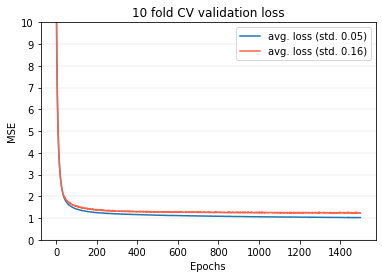

In [57]:
temp_l = l_val_cv0.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

#### parallel computation tests (ipyparallel vs Dask)

##### parallel loop using Dask

In [14]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=3)
client = Client(cluster)

In [ ]:
cluster

In [ ]:
def fun(x):
    return x+1

In [19]:
futures = client.map(fun, [1,2,3])
client.gather(futures)

[2, 3, 4]

In [20]:
futures = []
for x in [1,2,3]:
    future = client.submit(fun,x)
    futures.append(future)
client.gather(futures)

[2, 3, 4]

In [21]:
%%time
def parallel_cv(train, test):
    model = build_model_sgd_2hl(10,5, 0.0005, 0.7, 0.001 /1500, input_dim=X.shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1500, batch_size=32, verbose=0).history
    return x

futures = []
for train, test in kfold.split(X, y):
    future = client.submit(parallel_cv, train, test)
    futures.append(future)
results = client.gather(futures)

Wall time: 8min 13s


In [22]:
cluster.scale(2)

In [23]:
%%time
def parallel_cv(train, test):
    model = build_model_sgd_2hl(10,5, 0.0005, 0.7, 0.001 /1500, input_dim=X.shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1500, batch_size=32, verbose=0).history
    return x

futures = []
for train, test in kfold.split(X, y):
    future = client.submit(parallel_cv, train, test)
    futures.append(future)
results = client.gather(futures)

Wall time: 10min 47s


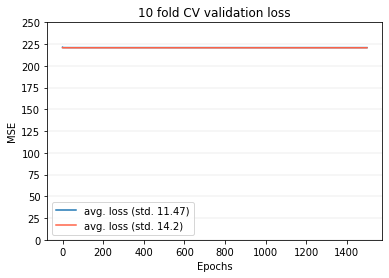

In [25]:
temp_l = results.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,250])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

In [30]:
%%time
temp_l = []
for train, test in kfold.split(X, y):
    model = build_model_sgd_2hl(neurons_l1=10,neurons_l2=5,l_rate= 0.0005,mom= 0.7,decay_epochs=1500)
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=200, batch_size=32, verbose=0).history
    temp_l.append(x)
l_val_cv0 = temp_l

Wall time: 1min 31s


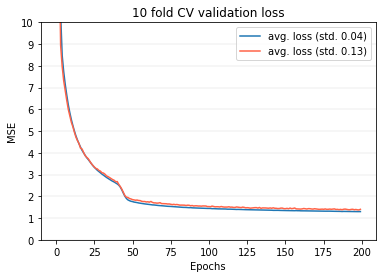

In [32]:
temp_l = l_val_cv0.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

In [33]:
%%time
def parallel_cv(train, test):
    model = build_model_sgd_2hl(neurons_l1=10,neurons_l2=5,l_rate= 0.0005,mom= 0.7,decay_epochs=1500)
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=200, batch_size=32, verbose=0).history
    return x

futures = []
for train, test in kfold.split(X, y):
    future = client.submit(parallel_cv, train, test)
    futures.append(future)
results = client.gather(futures)

Wall time: 1min 1s


In [35]:
cluster.scale(3)

In [36]:
%%time
def parallel_cv(train, test):
    model = build_model_sgd_2hl(neurons_l1=10,neurons_l2=5,l_rate= 0.0005,mom= 0.7,decay_epochs=1500)
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=200, batch_size=32, verbose=0).history
    return x

futures = []
for train, test in kfold.split(X, y):
    future = client.submit(parallel_cv, train, test)
    futures.append(future)
results = client.gather(futures)

Wall time: 1min 5s


In [37]:
cluster.scale(4)

In [38]:
%%time
def parallel_cv(train, test):
    model = build_model_sgd_2hl(neurons_l1=10,neurons_l2=5,l_rate= 0.0005,mom= 0.7,decay_epochs=1500)
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=200, batch_size=32, verbose=0).history
    return x

futures = []
for train, test in kfold.split(X, y):
    future = client.submit(parallel_cv, train, test)
    futures.append(future)
results = client.gather(futures)

Wall time: 1min 15s


##### parallel loop using ipyparallel

In [39]:
from functools import partial

In [40]:
from ipyparallel import Client
rc = Client()
dv = rc[:]
print(dv)

<DirectView [0, 1, 2]>


In [51]:
with dv.sync_imports():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import SGD, Adam
    from tensorflow.keras import backend

importing Sequential from tensorflow.keras.models on engine(s)
importing Dense from tensorflow.keras.layers on engine(s)
importing SGD,Adam from tensorflow.keras.optimizers on engine(s)
importing backend from tensorflow.keras on engine(s)


In [52]:
%%time
def parallel_cv(q):
    train = q[0]
    test = q[1]
    model = build_model_sgd_2hl(neurons_l1=10,neurons_l2=5,l_rate= 0.0005,mom= 0.7,decay_epochs=1500,input_dim=X.shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=200, batch_size=32, verbose=0).history
    return x
dv.update({'build_model_sgd_2hl':build_model_sgd_2hl, 'X': X, 'y': y, 'MEE':MEE})
res_iparallel = dv.map(parallel_cv, kfold.split(X, y)).get()

Wall time: 57 s


#### graphical analysis continued with ipyparallel

In [16]:
from functools import partial

In [ ]:
from ipyparallel import Client
rc = Client()
dv = rc[:]
print(dv)

In [51]:
with dv.sync_imports():
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.optimizers import SGD, Adam
    from tensorflow.keras import backend

importing Sequential from tensorflow.keras.models on engine(s)
importing Dense from tensorflow.keras.layers on engine(s)
importing SGD,Adam from tensorflow.keras.optimizers on engine(s)
importing backend from tensorflow.keras on engine(s)


In [52]:
%%time
def parallel_cv_2hl(q):
    train = q[0]
    test = q[1]
    model = build_model_sgd_2hl(neurons_l1=10,neurons_l2=5,l_rate= 0.0005,mom= 0.7,decay_epochs=1500,input_dim=X.shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=200, batch_size=32, verbose=0).history
    return x
dv.update({'build_model_sgd_2hl':build_model_sgd_2hl, 'X': X, 'y': y, 'MEE':MEE})
res_iparallel = dv.map(parallel_cv, kfold.split(X, y)).get()

Wall time: 57 s


In [ ]:
dic = {}
dic['5-5'] = dv.map(partial(parallel_cv_2hl,n1=10,n2=5), kfold.split(X, y)).get()
dic['20-20'] = dv.map(partial(parallel_cv_2hl,n1=20,n2=20), kfold.split(X, y)).get()
dic['50-50'] = dv.map(partial(parallel_cv_2hl,n1=50,n2=50), kfold.split(X, y)).get()

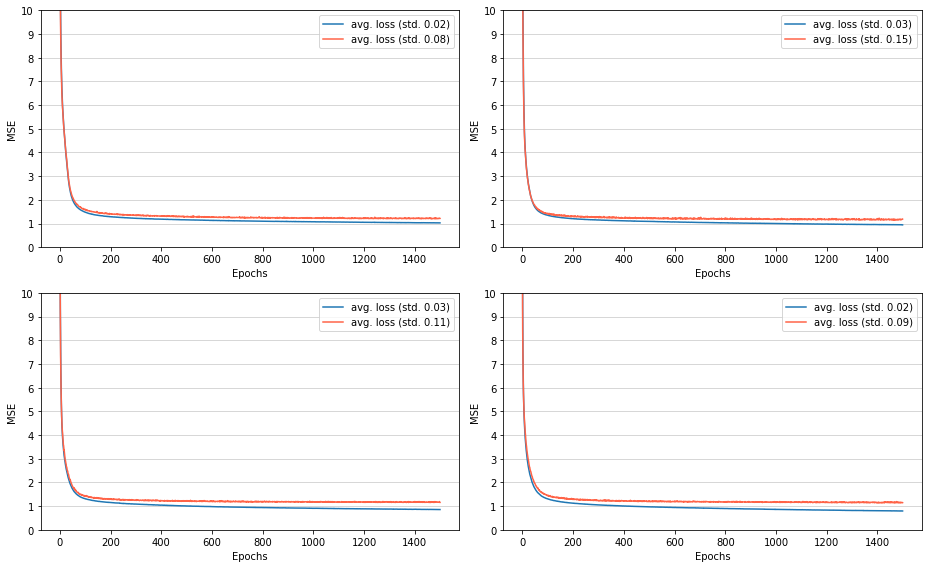

In [86]:
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, _1, _2 in zip([res_105,res_1010,res_2010,res_2020], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[_1, _2])
    temp_l = _.copy()
    #for _ in range(10):
      #plt.plot(temp_l[_]['loss'], color = 'lightblue')
     #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
    avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
    avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
    plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
    plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
    #plt.title(f'{_=}'.split('=')[0])
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth=0.5)
    plt.legend()
plt.tight_layout()
plt.show()

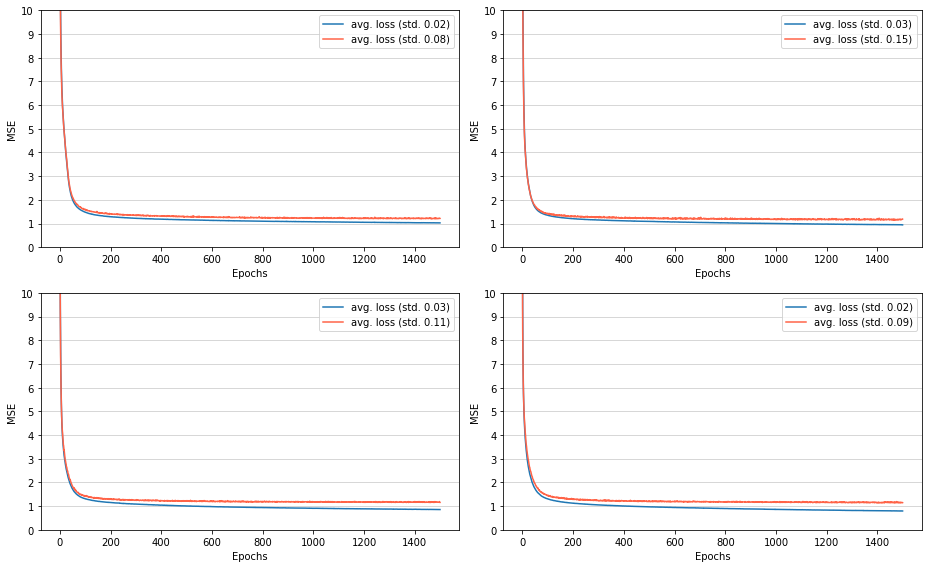

In [86]:
fig, ax = plt.subplots(2,2,figsize=(13,8))
for _, _1, _2 in zip([res_105,res_1010,res_2010,res_2020], [0,0,1,1],[0,1,0,1]):
    plt.sca(ax[_1, _2])
    temp_l = _.copy()
    #for _ in range(10):
      #plt.plot(temp_l[_]['loss'], color = 'lightblue')
     #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
    avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
    avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
    plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
    plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
    #plt.title(f'{_=}'.split('=')[0])
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim([0,10])
    plt.locator_params(axis='y', nbins=10)
    plt.grid(axis='y', linewidth=0.5)
    plt.legend()
plt.tight_layout()
plt.show()

In [39]:
dic['res_3030'] = dv.map(partial(parallel_cv,n1=30,n2=30), kfold.split(X, y)).get()

NameError: name 'dic' is not defined

In [ ]:
temp_l = dic['res_3030'].copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

In [57]:
 from tensorflow.keras.callbacks import EarlyStopping
 from tensorflow.keras.callbacks import Callback

In [23]:
def build_model_sgd_2hl(neurons_l1,neurons_l2, l_rate, mom=0, decay_epochs=10000, nesterov = True, weights_init = 'he_uniform', input_dim = X_train.shape[1]):
    model = Sequential()
    model.add(Dense(neurons_l1, input_dim=input_dim, activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(neurons_l2, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= l_rate/decay_epochs, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

NameError: name 'X_train' is not defined

In [59]:
%%time
def parallel_cv_gridsearch_2hl(split_data,neurons_l1, neurons_l2, l_rate, mom, decay_epochs, weights_init, batch_size):
    train = split_data[0]
    test = split_data[1]
    model = build_model_sgd_2hl(neurons_l1,neurons_l2, l_rate, mom, l_rate/decay_epochs, weights_init, input_dim=X.shape[1])
    es = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience = 100, min_delta = 0.001, verbose = 1)
    model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1500, batch_size=batch_size, verbose=0, callbacks=[es]).history
    scores = model.evaluate(X.iloc[test,:], y.iloc[test], verbose=0)
    return scores
dv.update({'parallel_cv_gridsearch_2hl':parallel_cv_gridsearch_2hl, 'X': X, 'y': y})

Wall time: 16 ms


<AsyncResult: _push>

In [62]:
%%time
def parallel_cv_gridsearch_2hl(split_data,neurons_l1, neurons_l2, l_rate):
    train = split_data[0]
    test = split_data[1]
    model = build_model_sgd_2hl(neurons_l1,neurons_l2, l_rate, input_dim=X.shape[1])
    es = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience = 100, min_delta = 0.001, verbose = 1)
    model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1500, batch_size=32, verbose=0, callbacks=[es]).history
    scores = model.evaluate(X.iloc[test,:], y.iloc[test], verbose=0)
    return scores
dv.update({'parallel_cv_gridsearch_2hl':parallel_cv_gridsearch_2hl, 'X': X, 'y': y, 'EarlyStopping':EarlyStopping})

Wall time: 8 ms


<AsyncResult: _push>

In [105]:
print(f'{num_folds}-CV Gridsearch\nTesting {len(grid)} parameter combinations')


5-CV Gridsearch
Testing 81 parameter combinations


In [113]:
%%time
# K-fold Cross Validation model evaluation
from sklearn.model_selection import ParameterGrid
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

mean_mae_list=[]
mean_loss_list=[]
param_dict = {
    'neurons_l1': np.arange(20,40,8),
    'neurons_l2' : np.arange(20,40,8),
    'l_rate' : np.arange(0.0005,0.0015,0.0004),
    'mom' : [0.6,0.7,0.8],
    }

grid = list(ParameterGrid(param_dict))
df_params = pd.DataFrame(ParameterGrid(param_dict))
print(f'{num_folds}-CV Gridsearch\nTesting {len(grid)} parameter combinations')
for i in df_params.index:
  fold_no = 1
  val_loss_per_fold = []
  loss_per_fold = []
  scores = dv.map(partial(parallel_cv_gridsearch_2hl,neurons_l1=df_params.loc[i,'neurons_l1'],neurons_l2=df_params.loc[i,'neurons_l1'],l_rate=df_params.loc[i,'l_rate']),
                  kfold.split(X, y)).get()
  mean_loss=np.mean([scores[_][0] for _ in range(num_folds)])
  mean_mae=np.mean([scores[_][1] for _ in range(num_folds)])
  df_params.loc[i,'loss'] = mean_loss
  df_params.loc[i,'mae'] = mean_mae
  mean_loss_list.append(mean_loss)
  mean_mae_list.append(mean_mae)
  #print(f'Score for fold: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  # Increase fold number
  fold_no = fold_no + 1
  print(par, f'- loss: {round(mean_loss,4)} - mae: {round(mean_mae,4)}')
id = mean_loss_list.index(min(mean_loss_list))
best_par = grid[id]
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print(best_par, f'- loss: {round(min(mean_loss_list),4)} - mae: {round(min(mean_mae_list),4)}')

5-CV Gridsearch
Testing 81 parameter combinations
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.1981 - mae: 0.8273
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.1809 - mae: 0.8241
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.2479 - mae: 0.8502
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.1926 - mae: 0.8258
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.2088 - mae: 0.8312
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.1913 - mae: 0.8257
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.1993 - mae: 0.8318
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.1842 - mae: 0.8232
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.1717 - mae: 0.8259
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.2264 - mae: 0.837
{'l_rate': 0.0005, 'neurons_l1': 20, 'neurons_l2': 20} - loss: 1.2185 - mae: 0.8362
{'l_rate': 0.0005, 'neurons

In [ ]:
mean_l

In [83]:
min(mean_loss_list)

1.2236746072769165

In [79]:
mean_loss_list.index(min(mean_loss))

TypeError: 'numpy.float64' object is not iterable

In [74]:
id = mean_loss_list.index(min(mean_loss))
best_par = grid[id]

AttributeError: 'numpy.float64' object has no attribute 'index'

In [ ]:
from sklearn.model_selection import ParameterGrid
X = X_encoded
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

mean_acc=[]
mean_loss=[]
# K-fold Cross Validation model evaluation
neuron1_arr = np.arange(15,25)
neuron2_arr = np.arange(15,25)
mom_arr = np.arange(0.5,0.9, 0.1)

param_dict = dict(neuron1 = neuron1_arr, neuron2 = neuron2_arr, mom = mom_arr)
grid = list(ParameterGrid(param_dict))

for par in grid:
  fold_no = 1
  acc_per_fold = []
  loss_per_fold=[]
  for train, test in kfold.split(X, y):

    # Define the model
    model = build_model_flex(0.1, 4, mom = par['mom'], lam2 = par['lam2'])
    callback = EarlyStopping(monitor = 'val_loss', mode = 'auto', patience = 100, min_delta = 0, verbose = 1)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model.fit(X.iloc[train,:], y.iloc[train],
                batch_size=len(train),
                epochs=500, validation_data=(X.iloc[test,:], y.iloc[test]), callbacks = [callback], verbose=0)

    # Generate generalization metrics
    scores = model.evaluate(X.iloc[test,:], y.iloc[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    #print(f'Stopped at epoch {}')

    # Increase fold number
    fold_no = fold_no + 1
  mean_acc.append( np.mean(acc_per_fold))
  mean_loss.append( np.mean(loss_per_fold))
min_val_loss = min(mean_loss)
id = mean_loss.index(min_val_loss)
best_par = grid[id]
accuracy = mean_acc[id]
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print(best_par)

In [64]:
%%time
def parallel_cv(q):
    train = q[0]
    test = q[1]
    model = build_model_sgd_2hl(20,10, 0.0005, 0.7, 0.001 /1500, input_dim=X.shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1500, batch_size=32, verbose=0).history
    return x
dv.update({'build_model_sgd_2hl':build_model_sgd_2hl, 'X': X, 'y': y})
res = dv.map(parallel_cv, kfold.split(X, y)).get()

Wall time: 6min 14s


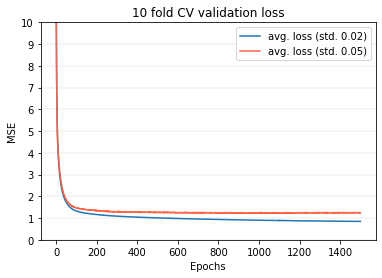

In [65]:
temp_l = res.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

In [ ]:
%%time
def parallel_cv(q):
    train = q[0]
    test = q[1]
    model = build_model_sgd(20, 0.001, 0.9, 0.001/10000, X.iloc[train,:].shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=2000, batch_size=len(train), verbose=0).history
    return x
dv.update({'build_model_sgd':build_model_sgd, 'X': X, 'y': y})
res = dv.map(parallel_cv, kfold.split(X, y)).get()

Wall time: 5min 55s


In [22]:
%%time
def parallel_cv(q):
    train = q[0]
    test = q[1]
    model = build_model_sgd(20, 0.001, 0.9, 0.001/10000, X.iloc[train,:].shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=20000, batch_size=len(train), verbose=0).history
    return x
dv.update({'build_model_sgd':build_model_sgd, 'X': X, 'y': y})
res_batch = dv.map(parallel_cv, kfold.split(X, y)).get()

Wall time: 56min 46s


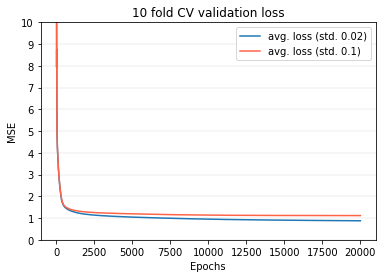

In [26]:
temp_l = res_batch.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

In [25]:
%%time
def parallel_cv(q):
    train = q[0]
    test = q[1]
    model = build_model_sgd(20, 0.0005, 0.9, 0.001/1000, X.iloc[train,:].shape[1])
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1000, batch_size=32, verbose=0).history
    return x
dv.update({'build_model_sgd':build_model_sgd, 'X': X, 'y': y})
res_mini = dv.map(parallel_cv, kfold.split(X, y)).get()

Wall time: 6min 41s


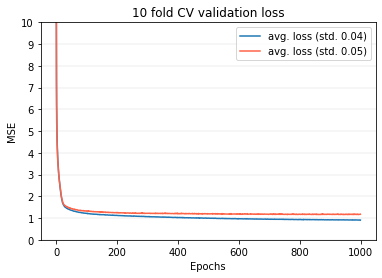

In [27]:
temp_l = res_mini.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(5)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(5)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(5)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(5)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

### let's check the behaviour with some multi-layers NN

In [105]:
def build_model_adam(n_layer1, n_layer2):
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_layer2, activation='relu'))
    model.add(Dense(2))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MAE'])
    return model

In [158]:
def build_model_sgd(n_layer1, n_layer2, l_rate, mom=0, decay=0, nesterov = True, weights_init='he_uniform'):
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=X_train.shape[1], activation = 'relu', kernel_initializer = weights_init))
    model.add(Dense(n_layer2, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= decay, nesterov = nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

In [ ]:
history_l = []
for _ in range(10):
    model = build_model_sgd(1,1, 0.001, 0.5, 0.001/50)
    history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=0).history
    history_l.append(history)
l11 = history_l.copy()

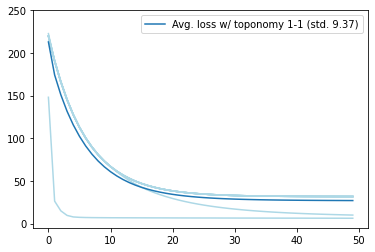

In [46]:
history_l = l11.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label = f'Avg. loss w/ toponomy 1-1 (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)})')
plt.ylim([-5,250])
plt.legend()

In [48]:
history_l = []
for _ in range(10):
    model = build_model_sgd(1,2, 0.001, 0.5, 0.001/50)
    history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=0).history
    history_l.append(history)
l12 = history_l.copy()

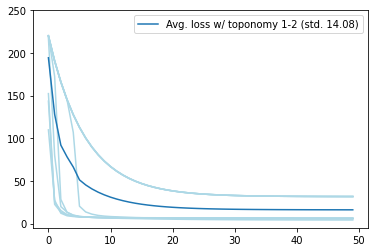

In [55]:
history_l = l12.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label = f'Avg. loss w/ toponomy 1-2 (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)})')
plt.ylim([-5,250])
plt.legend()

In [51]:
history_l = []
for _ in range(10):
    model = build_model_sgd(1,5, 0.001, 0.5, 0.001/50)
    history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=0).history
    history_l.append(history)
l15 = history_l.copy()

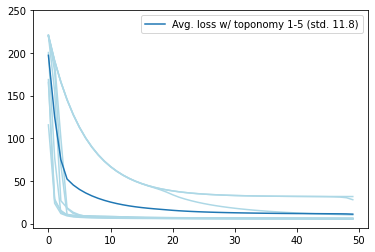

In [56]:
history_l = l15.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label = f'Avg. loss w/ toponomy 1-5 (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)})')
plt.ylim([-5,250])
plt.legend()

In [53]:
history_l = []
for _ in range(10):
    model = build_model_sgd(1,10, 0.001, 0.5, 0.001/50)
    history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=0).history
    history_l.append(history)
l110 = history_l.copy()

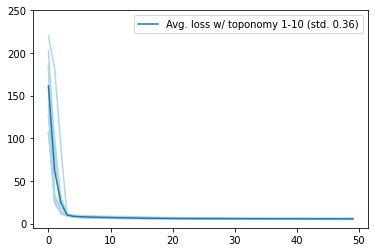

In [57]:
history_l = l110.copy()
for _ in range(10):
    plt.plot(history_l[_]['loss'], color='lightblue')
plt.plot([np.mean(x) for x in zip(*[history_l[_]['loss'] for _ in range(10)])], label = f'Avg. loss w/ toponomy 1-10 (std. {round(np.median([np.std(x) for x in zip(*[history_l[_]["loss"] for _ in range(10)])]),2)})')
plt.ylim([-5,250])
plt.legend()

In [58]:
d = {}
for n_neurons in [1,5,10,20]:
  l_temp = []
  for _ in range(10):
    model = build_model_sgd(1,n_neurons, 0.001, 0.5, 0.001/50)
    x = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dd2 = d.copy()

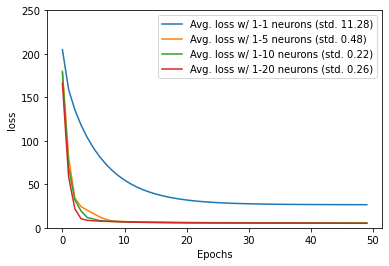

In [62]:
d = dd2.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 1-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,250])
plt.legend()
plt.show()

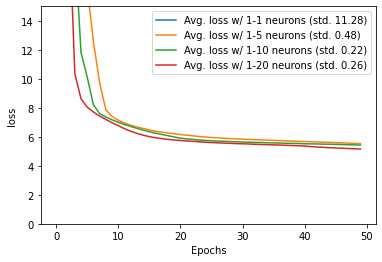

In [65]:
d = dd2.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 1-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,15])
plt.legend()
plt.show()

In [63]:
d = {}
for n_neurons in [1,5,10,20]:
  l_temp = []
  for _ in range(10):
    model = build_model_sgd(3,n_neurons, 0.001, 0.5, 0.001/50)
    x = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dd3 = d.copy()

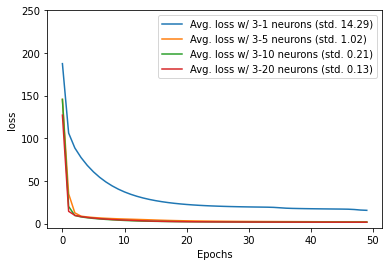

In [64]:
d = dd3.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 3-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([-5,250])
plt.legend()
plt.show()

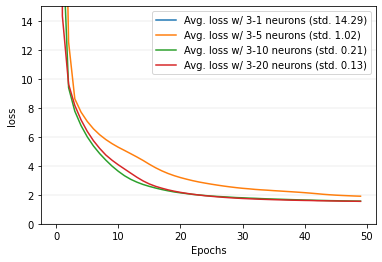

In [71]:
d = dd3.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 3-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,15])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

In [109]:
d = {}
for n_neurons in [1,5,10,20]:
  l_temp = []
  for _ in range(5):
    model = build_model_sgd(5,n_neurons, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dd5 = d.copy()

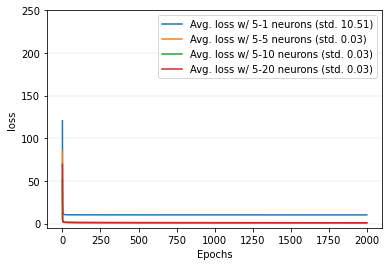

In [110]:
d = dd5.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 5-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([-5,250])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

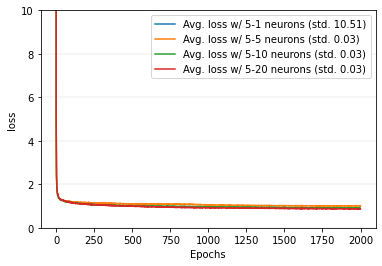

In [135]:
d = dd5.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 5-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,10])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

In [112]:
d = {}
for n_neurons in [1,5,10,20]:
  l_temp = []
  for _ in range(5):
    model = build_model_sgd(5,n_neurons, 0.01, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dd5b = d.copy()

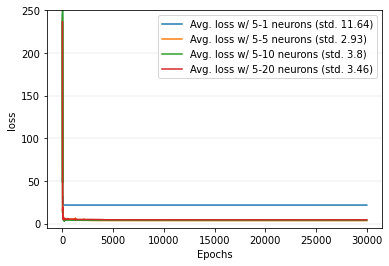

In [113]:
d = dd5b.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 5-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([-5,250])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

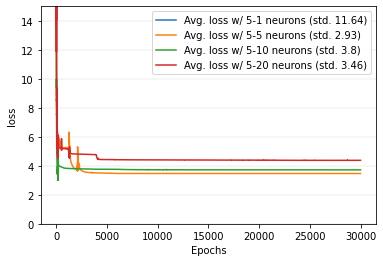

In [114]:
d = dd5b.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 5-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,15])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

In [161]:
d = {}
for n_neurons in [50,20,10,5]:
  l_temp = []
  for _ in range(2):
    model = build_model_sgd(n_neurons, 10, 0.002, 0.7, 0.001/1000)
    x = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dd10 = d.copy()

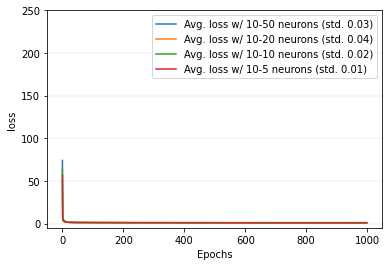

In [162]:
d = dd10.copy()
for n_neurons in [50,20,10,5]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 10-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([-5,250])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

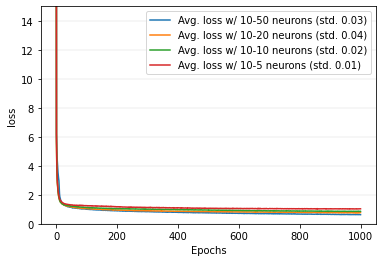

In [163]:
d = dd10.copy()
for n_neurons in [50,20,10,5]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 10-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,15])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

In [164]:
d = {}
for n_neurons in [50,20,10,5]:
  l_temp = []
  for _ in range(2):
    model = build_model_sgd(n_neurons, 20, 0.002, 0.7, 0.001/1000)
    x = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dd20 = d.copy()

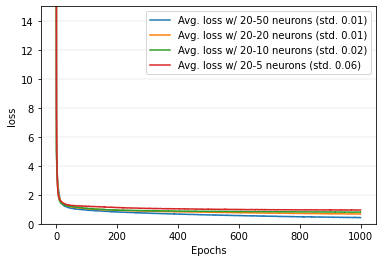

In [166]:
d = dd20.copy()
for n_neurons in [50,20,10,5]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 20-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,15])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

In [167]:
d = {}
for n_neurons in [50,20,10,5]:
  l_temp = []
  for _ in range(2):
    model = build_model_sgd(n_neurons, 30, 0.002, 0.7, 0.001/1000)
    x = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dd30 = d.copy()

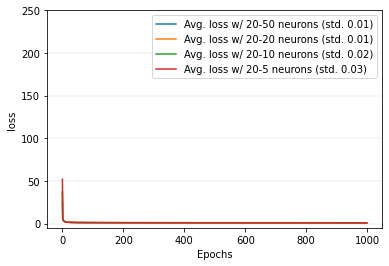

In [168]:
d = dd30.copy()
for n_neurons in [50,20,10,5]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 20-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([-5,250])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

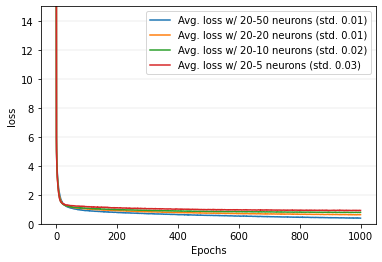

In [169]:
d = dd30.copy()
for n_neurons in [50,20,10,5]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ 20-{n_neurons} neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.ylim([0,15])
plt.grid(axis='y', linewidth =0.2)
plt.legend()
plt.show()

three layer analysis

In [115]:
def build_model_sgd(n_layer1, n_layer2, n_layer3, l_rate, mom, decay):
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_layer2, activation='relu'))
    model.add(Dense(n_layer3, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate = l_rate, momentum = mom, decay = decay)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

In [116]:
d = {}
for n_neurons in [1,5,10,20]:
  l_temp = []
  for _ in range(3):
    model = build_model_sgd(n_neurons, n_neurons ,5, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
  d[f'loss_{n_neurons}'] = l_temp
dt4 = d.copy()

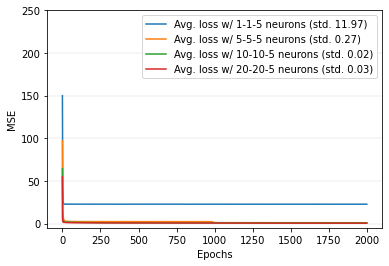

In [117]:
d = dt4.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ {n_neurons}-{n_neurons}-5 neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([-5,250])
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

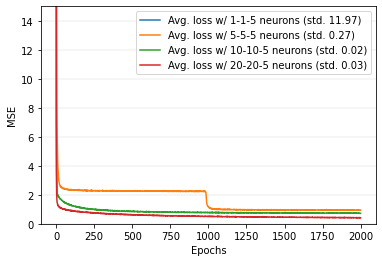

In [118]:
d = dt4.copy()
for n_neurons in [1,5,10,20]:
  plt.plot([np.mean(x) for x in zip(*d[f'loss_{n_neurons}'])], label = f'Avg. loss w/ {n_neurons}-{n_neurons}-5 neurons (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_{n_neurons}"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,15])
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

we settle on a 20 neurons model as we saw it provides a smooth learning curve and garantees a very small variance between weight initializations

In [119]:
def build_model_sgd_1l(n_layer1, l_rate, mom, decay):
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate = l_rate, momentum = mom, decay = decay)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model
def build_model_sgd_2l(n_layer1, n_layer2,  l_rate, mom, decay):
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_layer2, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate = l_rate, momentum = mom, decay = decay)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model
def build_model_sgd_3l(n_layer1, n_layer2, n_layer3,  l_rate, mom, decay):
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_layer2, activation='relu'))
    model.add(Dense(n_layer3, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate = l_rate, momentum = mom, decay = decay)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model
def build_model_sgd_4l(n_layer1, n_layer2, n_layer3, n_layer4,  l_rate, mom, decay):
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_layer2, activation='relu'))
    model.add(Dense(n_layer3, activation='relu'))
    model.add(Dense(n_layer4, activation='relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate = l_rate, momentum = mom, decay = decay)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

In [120]:
#let's compare the effect of multi layers with 12 neurons
d = {}
l_temp = []
identifier = '1l'
for _ in range(10):
    model = build_model_sgd_1l(12 , 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '2l'
for _ in range(10):
    model = build_model_sgd_2l(6,6, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '3l'
for _ in range(10):
    model = build_model_sgd_3l(4,4,4, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '4l'
for _ in range(10):
    model = build_model_sgd_4l(3,3,3,3, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
dt4_10 = d.copy()

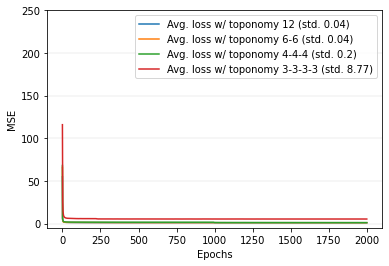

In [121]:
d = dt4_10.copy()
plt.plot([np.mean(x) for x in zip(*d[f'loss_1l'])], label = f'Avg. loss w/ toponomy 12 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_1l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_2l'])], label = f'Avg. loss w/ toponomy 6-6 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_2l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_3l'])], label = f'Avg. loss w/ toponomy 4-4-4 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_3l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_4l'])], label = f'Avg. loss w/ toponomy 3-3-3-3 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_4l"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([-5,250])
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

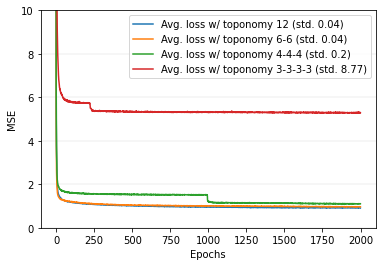

In [122]:
d = dt4_10.copy()
plt.plot([np.mean(x) for x in zip(*d[f'loss_1l'])], label = f'Avg. loss w/ toponomy 12 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_1l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_2l'])], label = f'Avg. loss w/ toponomy 6-6 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_2l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_3l'])], label = f'Avg. loss w/ toponomy 4-4-4 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_3l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_4l'])], label = f'Avg. loss w/ toponomy 3-3-3-3 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_4l"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [123]:
#let's compare the effect of multi layers with 24 neurons
d = {}
l_temp = []
identifier = '1l'
for _ in range(10):
    model = build_model_sgd_1l(24 , 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '2l'
for _ in range(10):
    model = build_model_sgd_2l(12,12, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '3l'
for _ in range(10):
    model = build_model_sgd_3l(8,8,8, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '4l'
for _ in range(10):
    model = build_model_sgd_4l(6,6,6,6, 0.003, 0.7, 0.001/2000)
    x = model.fit(X_train, y_train, epochs=2000, batch_size=32, verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
dt4_24 = d.copy()

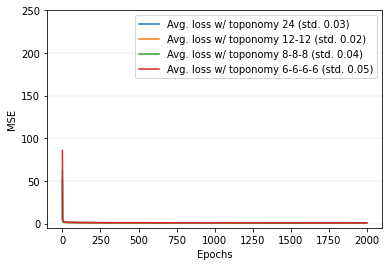

In [124]:
d = dt4_24.copy()
plt.plot([np.mean(x) for x in zip(*d[f'loss_1l'])], label = f'Avg. loss w/ toponomy 24 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_1l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_2l'])], label = f'Avg. loss w/ toponomy 12-12 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_2l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_3l'])], label = f'Avg. loss w/ toponomy 8-8-8 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_3l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_4l'])], label = f'Avg. loss w/ toponomy 6-6-6-6 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_4l"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([-5,250])
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

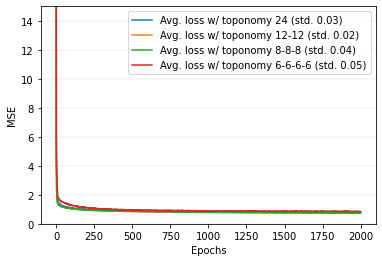

In [125]:
d = dt4_24.copy()
plt.plot([np.mean(x) for x in zip(*d[f'loss_1l'])], label = f'Avg. loss w/ toponomy 24 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_1l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_2l'])], label = f'Avg. loss w/ toponomy 12-12 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_2l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_3l'])], label = f'Avg. loss w/ toponomy 8-8-8 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_3l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_4l'])], label = f'Avg. loss w/ toponomy 6-6-6-6 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_4l"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,15])
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [ ]:
#batch mode

In [132]:
#let's compare the effect of multi layers with 12 neurons
d = {}
l_temp = []
identifier = '1l'
for _ in range(3):
    model = build_model_sgd_1l(12 , 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '2l'
for _ in range(3):
    model = build_model_sgd_2l(6,6, 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '3l'
for _ in range(3):
    model = build_model_sgd_3l(4,4,4, 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '4l'
for _ in range(3):
    model = build_model_sgd_4l(3,3,3,3, 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
dt4_10b = d.copy()

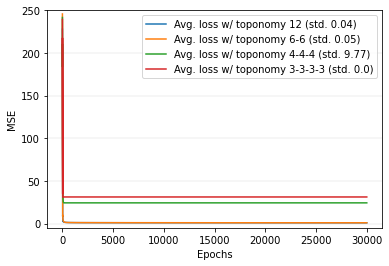

In [133]:
d = dt4_10b.copy()
plt.plot([np.mean(x) for x in zip(*d[f'loss_1l'])], label = f'Avg. loss w/ toponomy 12 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_1l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_2l'])], label = f'Avg. loss w/ toponomy 6-6 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_2l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_3l'])], label = f'Avg. loss w/ toponomy 4-4-4 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_3l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_4l'])], label = f'Avg. loss w/ toponomy 3-3-3-3 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_4l"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([-5,250])
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

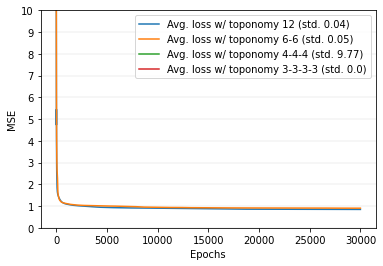

In [137]:
d = dt4_10b.copy()
plt.plot([np.mean(x) for x in zip(*d[f'loss_1l'])], label = f'Avg. loss w/ toponomy 12 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_1l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_2l'])], label = f'Avg. loss w/ toponomy 6-6 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_2l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_3l'])], label = f'Avg. loss w/ toponomy 4-4-4 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_3l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_4l'])], label = f'Avg. loss w/ toponomy 3-3-3-3 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_4l"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.legend()
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [129]:
#let's compare the effect of multi layers with 24 neurons
d = {}
l_temp = []
identifier = '1l'
for _ in range(3):
    model = build_model_sgd_1l(24 , 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '2l'
for _ in range(3):
    model = build_model_sgd_2l(12,12, 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '3l'
for _ in range(3):
    model = build_model_sgd_3l(8,8,8, 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
l_temp = []
identifier = '4l'
for _ in range(3):
    model = build_model_sgd_4l(6,6,6,6, 0.005, 0.9, 0.001/30000)
    x = model.fit(X_train, y_train, epochs=30000, batch_size=len(X_train), verbose=0).history
    l_temp.append(x['loss'])
    d[f'loss_{identifier}'] = l_temp
dt4_24b = d.copy()

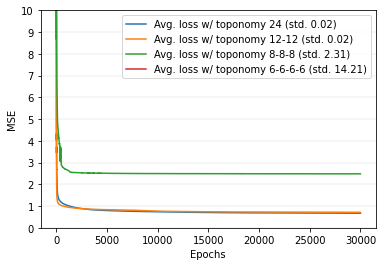

In [139]:
d = dt4_24b.copy()
plt.plot([np.mean(x) for x in zip(*d[f'loss_1l'])], label = f'Avg. loss w/ toponomy 24 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_1l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_2l'])], label = f'Avg. loss w/ toponomy 12-12 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_2l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_3l'])], label = f'Avg. loss w/ toponomy 8-8-8 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_3l"])]),2)})')
plt.plot([np.mean(x) for x in zip(*d[f'loss_4l'])], label = f'Avg. loss w/ toponomy 6-6-6-6 (std. {round(np.median([np.std(x) for x in zip(*d[f"loss_4l"])]),2)})')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.legend()
plt.grid(axis='y', linewidth =0.2)
plt.show()

### 6-6 toponomy

From our first graphical analysis we concluded that a 10-10 toponomy is a good model setup for learning our problem.
We also saw that no model can perfectly learn the training data thus indicating us that there is noise in the data.

by using 20 neurons we ensure that the variance from different weights initialization is minimized to an extent where we can ignore and thus avoid to repeat multiple iteration for each hyperparameter configuration

comparison of minibatch32 vs full batch mode in terms of computational effort and convergence time

In [148]:
def build_model_sgd(l_rate, mom=0, decay=0, nesterov = False, weights_init = 'he_uniform'):
    model = Sequential()
    model.add(Dense(50, input_dim=X_train.shape[1], activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= decay, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [152]:
model = build_model_sgd(0.003, 0.9, 0.001/1000, True, 'he_uniform')
history_l = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0).history

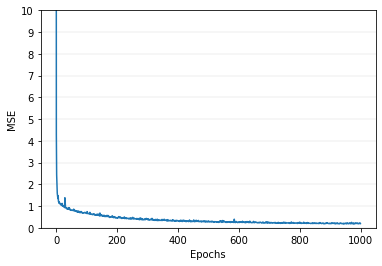

In [153]:
plt.plot(history_l['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth =0.2)
plt.show()

In [238]:
kfold = KFold(n_splits=10, shuffle=True)

In [240]:
temp_l = []
for train, test in kfold.split(X, y):
    model = build_model_sgd(0.003, 0.9, 0.001/1000, True, 'he_uniform')
    x = model.fit(X.iloc[train,:], y.iloc[train,:], epochs=1000, batch_size=32, verbose=0).history
    temp_l.append(x)
l_val_cv = temp_l

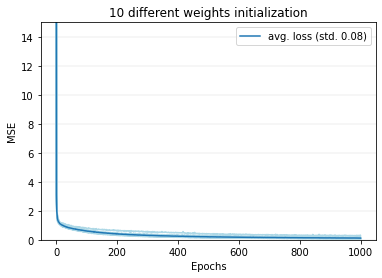

In [241]:
for _ in range(10):
  plt.plot(l_val_cv[_]['loss'], color = 'lightblue')
avg_list = [sum(x)/len(temp_l) for x in zip(*[l_val_cv[_]['loss'] for _ in range(10)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[l_val_cv[_]["loss"] for _ in range(10)])]),2)})', color = 'C0')
plt.title(f'10 different weights initialization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,15])
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

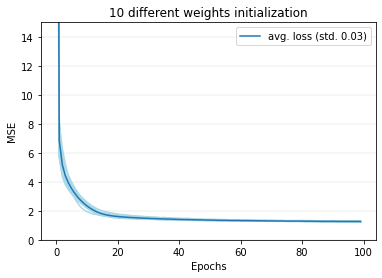

In [169]:
for _ in range(10):
  plt.plot(l_val_cv[_]['loss'], color = 'lightblue')
avg_list = [sum(x)/len(temp_l) for x in zip(*[l_val_cv[_]['loss'] for _ in range(10)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[l_val_cv[_]["loss"] for _ in range(10)])]),2)})', color = 'C0')
plt.title(f'10 different weights initialization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,15])
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

we can see that as we planned, overall std from weight initializations in minimazed to an extent where it can be ignored

cross validated validation loss

In [243]:
kfold = KFold(n_splits=10, shuffle=True)

In [244]:
temp_l = []
for train, test in kfold.split(X, y):
    model = build_model_sgd(0.003, 0.9, 0.001/1000, True, 'he_uniform')
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1000, batch_size=32, verbose=0).history
    temp_l.append(x)
l_val_cv1 = temp_l

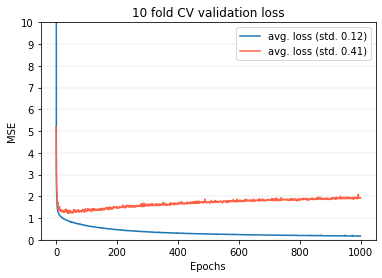

In [261]:
temp_l = l_val_cv1.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
 #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(10)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(10)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[l_val_cv1[_]["loss"] for _ in range(10)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[l_val_cv1[_]["val_loss"] for _ in range(10)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linewidth=0.2)
plt.legend()
plt.show()

In [250]:
def build_model_sgd(l_rate, mom=0, decay=0, nesterov = False, weights_init = 'glorot_uniform'):
    model = Sequential()
    model.add(Dense(10 ,input_dim=X_train.shape[1], activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= decay, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

In [253]:
temp_l = []
for train, test in kfold.split(X, y):
    model = build_model_sgd(0.003, 0.9, 0.001/100, True, 'he_uniform')
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=100, batch_size=32, verbose=0).history
    temp_l.append(x)
l_val_cv2 = temp_l

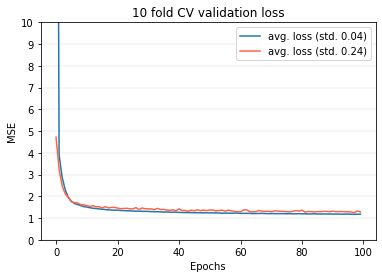

In [260]:
temp_l = l_val_cv2
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
  #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(10)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(10)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(10)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(10)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.grid(axis='y', linewidth=0.2)
plt.locator_params(axis='y', nbins=10)
plt.legend()
plt.show()

In [271]:
d = {}
for _ in [0.3,0.5,0.7,0.9]:
    temp_l = []
    for train, test in kfold.split(X, y):
        model = build_model_sgd(0.003, _, 0.001/100, True, 'he_uniform')
        x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=100, batch_size=32, verbose=0).history
        temp_l.append(x)
    d[f'temp_{_}'] = temp_l
dic_val = d.copy()

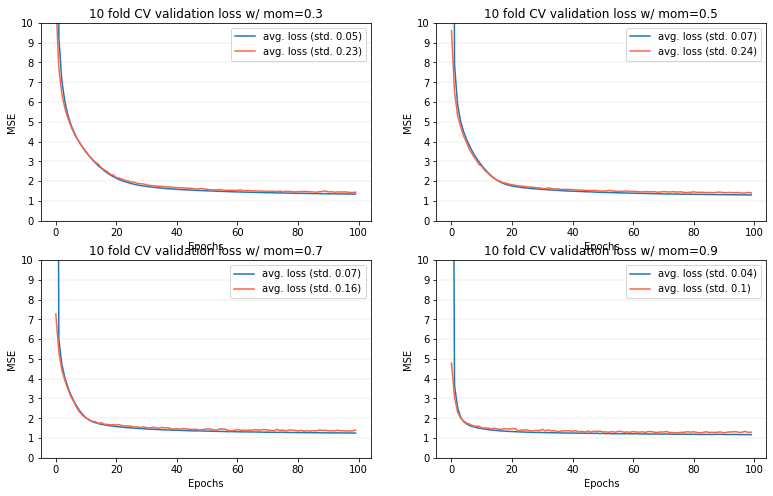

In [273]:
fig, axs = plt.subplots(2,2,figsize=(13,8))
temp_d = dic_val.copy()
for _, n1,n2 in zip([0.3,0.5,0.7,0.9], [0,0,1,1], [0,1,0,1]):
    temp_l = temp_d[f'temp_{_}']
    plt.sca(axs[n1,n2])
    #for _ in range(10):
      #plt.plot(temp_l[_]['loss'], color = 'lightblue')
      #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
    avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(10)])]
    avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(10)])]
    plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(10)])]),2)})', color = 'C0')
    plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(10)])]),2)})', color = 'tomato')
    plt.title(f'10 fold CV validation loss w/ mom={_}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim([0,10])
    plt.grid(axis='y', linewidth=0.2)
    plt.locator_params(axis='y', nbins=10)
    plt.legend()
plt.show()

In [277]:
d = {}
for _ in [0.0001,0.001,0.01,0.05]:
    temp_l = []
    for train, test in kfold.split(X, y):
        model = build_model_sgd(_, 0.9, 0.001/1000, True, 'he_uniform')
        x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1000, batch_size=32, verbose=0).history
        temp_l.append(x)
    d[f'temp_{_}'] = temp_l
dic_val1 = d.copy()

KeyError: 'temp_0.1'

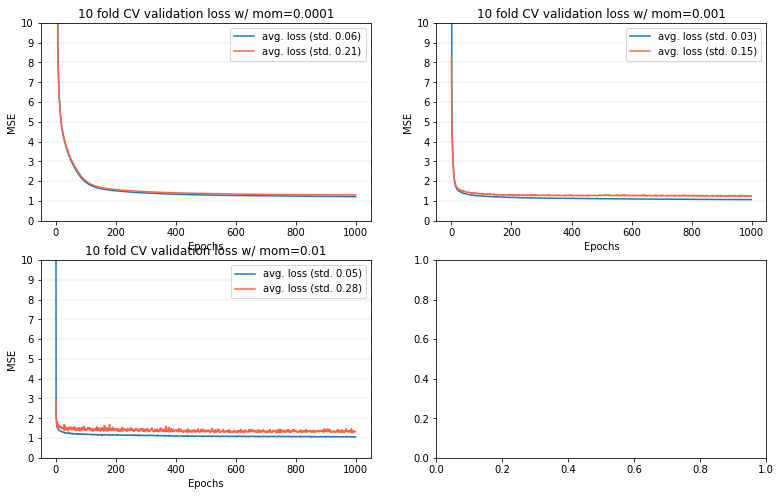

In [278]:
fig, axs = plt.subplots(2,2,figsize=(13,8))
temp_d = dic_val1.copy()
for _, n1,n2 in zip([0.0001,0.001,0.01,0.1], [0,0,1,1], [0,1,0,1]):
    temp_l = temp_d[f'temp_{_}']
    plt.sca(axs[n1,n2])
    #for _ in range(10):
      #plt.plot(temp_l[_]['loss'], color = 'lightblue')
      #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
    avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(10)])]
    avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(10)])]
    plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(10)])]),2)})', color = 'C0')
    plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(10)])]),2)})', color = 'tomato')
    plt.title(f'10 fold CV validation loss w/ mom={_}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim([0,10])
    plt.grid(axis='y', linewidth=0.2)
    plt.locator_params(axis='y', nbins=10)
    plt.legend()
plt.show()

### parrallel computation trials

linear computation

In [10]:
def build_model_sgd(l_rate, mom=0, decay=0, nesterov = False, weights_init = 'glorot_uniform'):
    model = Sequential()
    model.add(Dense(10 ,input_dim=X.shape[1], activation = 'relu', kernel_initializer=weights_init))
    model.add(Dense(2))
    opt = SGD(learning_rate=l_rate, momentum=mom, decay= decay, nesterov=nesterov)
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
    return model

In [11]:
%%time
temp_l = []
for train, test in kfold.split(X, y):
    model = build_model_sgd(0.003, 0.9, 0.001/100, True, 'he_uniform')
    x = model.fit(X.iloc[train,:], y.iloc[train,:], validation_data= (X.iloc[test,:], y.iloc[test,:]), epochs=1000, batch_size=32, verbose=0).history
    temp_l.append(x)
l_val_cv2 = temp_l

Wall time: 17min 2s


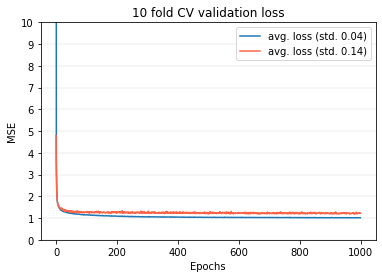

In [14]:
temp_l = l_val_cv2
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
  #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['loss'] for _ in range(10)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[_]['val_loss'] for _ in range(10)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["loss"] for _ in range(10)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[_]["val_loss"] for _ in range(10)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.grid(axis='y', linewidth=0.2)
plt.locator_params(axis='y', nbins=10)
plt.legend()
plt.show()

parallel computation for cross validation

In [1]:
%%time
import pandas as pd
from sklearn.model_selection import train_test_split
import para_cv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold

if __name__ == '__main__':
    ml_train = pd.read_csv('ML-CUP21-TR - Copy.csv', sep=',', header=None)
    ml_train.drop(0, axis = 1, inplace=True)
    rename_dict = {}
    for i in range(1,11): rename_dict[i] = f"attr_{i}"
    rename_dict.update({11:'target_1', 12:'target_2'})
    ml_train.rename( columns=rename_dict, inplace =True)
    X = ml_train.iloc[:,:10]
    y = ml_train.loc[:,['target_1','target_2']]
    X, X_test_final, y, y_test_final = train_test_split(X, y, test_size=0.1) 
    def build_model_sgd(l_rate, mom=0, decay=0, nesterov = False, weights_init = 'glorot_uniform'):
        model = Sequential()
        model.add(Dense(10 ,input_dim=X.shape[1], activation = 'relu', kernel_initializer=weights_init))
        model.add(Dense(2))
        opt = SGD(learning_rate=l_rate, momentum=mom, decay= decay, nesterov=nesterov)
        model.compile(loss='mean_squared_error', optimizer=opt, metrics=['MAE'])
        return model
    #model = build_model_sgd(0.003, 0.9, 0.001/100, True, 'he_uniform')
    kfold = KFold(n_splits=10, shuffle=True)
    res = para_cv.launch(X = X,
                y = y,
                kfold = kfold,
                epochs = 10,
                batch_size = 32)
    #print(res)

Wall time: 10min 37s


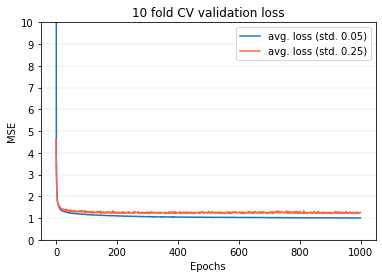

In [13]:
temp_l = res.copy()
#for _ in range(10):
  #plt.plot(temp_l[_]['loss'], color = 'lightblue')
  #plt.plot(temp_l[_]['val_loss'], color = 'peachpuff')
avg_list = [sum(x)/len(temp_l) for x in zip(*[temp_l[f'key_{_}']['loss'] for _ in range(10)])]
avg_list_val = [sum(x)/len(temp_l) for x in zip(*[temp_l[f'key_{_}']['val_loss'] for _ in range(10)])]
plt.plot(avg_list, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[f"key_{_}"]["loss"] for _ in range(10)])]),2)})', color = 'C0')
plt.plot(avg_list_val, label=f'avg. loss (std. {round(np.median([np.std(x) for x in zip(*[temp_l[f"key_{_}"]["val_loss"] for _ in range(10)])]),2)})', color = 'tomato')
plt.title(f'10 fold CV validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim([0,10])
plt.grid(axis='y', linewidth=0.2)
plt.locator_params(axis='y', nbins=10)
plt.legend()
plt.show()